In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error

In [ ]:
df = sns.load_dataset('penguins')
print(df.head(10))
df.info()
df.describe()
categorical_cols = df.select_dtypes(include=['object', 'category'])
unique_counts = categorical_cols.nunique()

print(unique_counts)

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   
5  Adelie  Torgersen            39.3           20.6              190.0   
6  Adelie  Torgersen            38.9           17.8              181.0   
7  Adelie  Torgersen            39.2           19.6              195.0   
8  Adelie  Torgersen            34.1           18.1              193.0   
9  Adelie  Torgersen            42.0           20.2              190.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  
5       3650.0    Male  
6       36

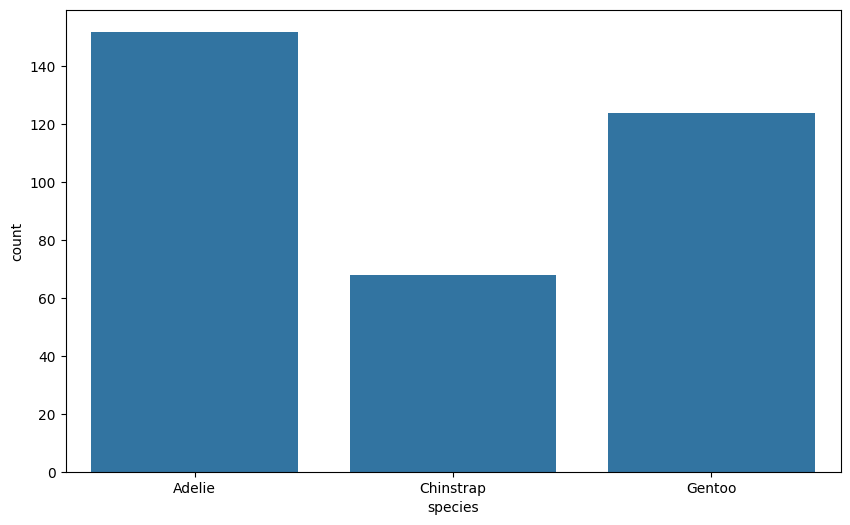

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df,x="species")
plt.show()


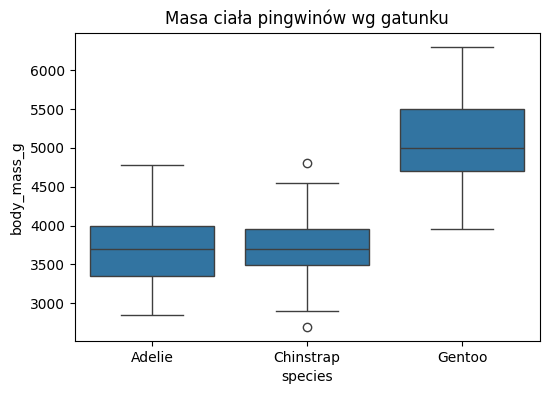

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x="species", y="body_mass_g")
plt.title("Masa ciała pingwinów wg gatunku")
plt.show()

In [ ]:
print("Średnia długość dzioba wg wyspy:")
display(df.groupby("island")["bill_length_mm"].mean())

Średnia długość dzioba wg wyspy:


,bill_length_mm
island,
Biscoe,45.257485
Dream,44.167742
Torgersen,38.950980


In [ ]:
print("Średnia długość dzioba wg wyspy:")
display(df.groupby("island")["body_mass_g"].mean())

Średnia długość dzioba wg wyspy:


,body_mass_g
island,
Biscoe,4716.017964
Dream,3712.903226
Torgersen,3706.372549


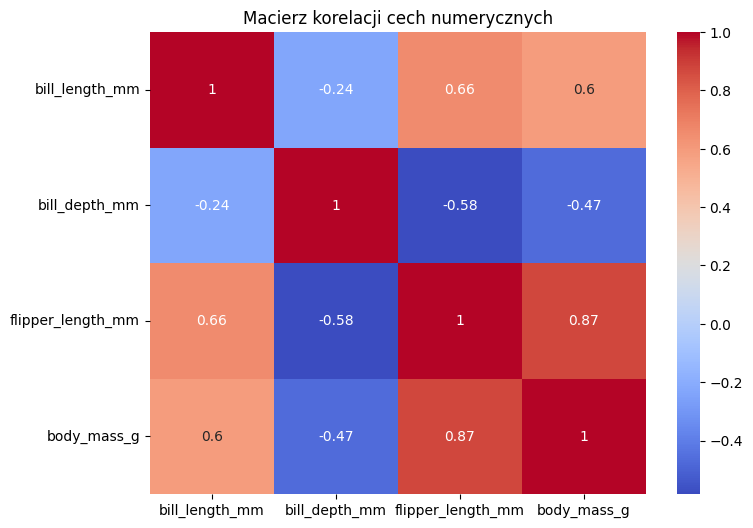

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Macierz korelacji cech numerycznych")
plt.show()

In [ ]:
data = df.copy()
data = data.dropna()

X = pd.get_dummies(data.drop("body_mass_g", axis=1), drop_first=True)

y = data["body_mass_g"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

RMSE: 257.8733358697924


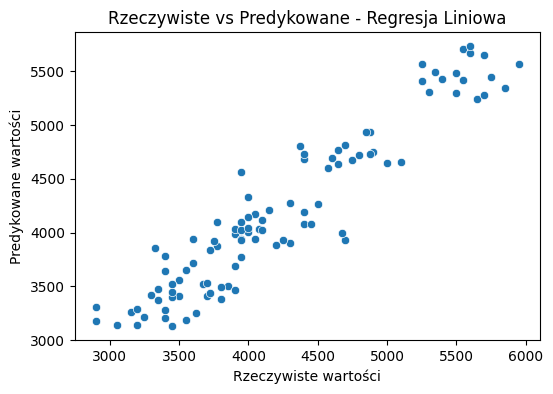

In [ ]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
plt.figure(figsize=(6,4))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Rzeczywiste wartości")
plt.ylabel("Predykowane wartości")
plt.title("Rzeczywiste vs Predykowane - Regresja Liniowa")
plt.show()